# Convolutional Neural Networks

Q2. Implement hand written recognition using CNN model for mnist dataset. 

https://yann.lecun.com/exdb/mnist/ 

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Flatten


## Loading the Handwritten Digits MNIST Dataset (from keras.datasets)

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

print(' Training Features Vector: ' + str(trainX.shape))
print(' Training Target Vector: ' + str(trainy.shape))
print(' Testing Features Vector: ' + str(testX.shape))
print(' Testing Target Vector: ' + str(testy.shape))

11501568/11490434 [==============================] - 0s 0us/step
 Training Features Vector: (60000, 28, 28)
 Training Target Vector: (60000,)
 Testing Features Vector: (10000, 28, 28)
 Testing Target Vector: (10000,)


## Visualization of Data - Exploration

### - Target Value Analysis

Text(0.5, 0, 'Digit')

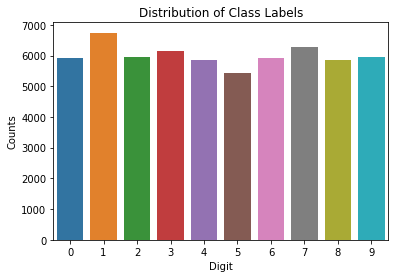

In [3]:
target_labels = [str(x) for x in range(10)]

sns.countplot(x=trainy)
plt.title('Distribution of Class Labels')
plt.ylabel('Counts')
plt.xlabel('Digit')

### - Checking for NULL Values

In [4]:
trainX_nan = np.isnan(np.sum(trainX))
testX_nan = np.isnan(np.sum(testX))
print(f'Training Set has NULL/ missing values: {trainX_nan}')
print(f'Testing Set has NULL/ missing values: {testX_nan}')

Training Set has NULL/ missing values: False
Testing Set has NULL/ missing values: False


### - Sample Class Images from the Dataset

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


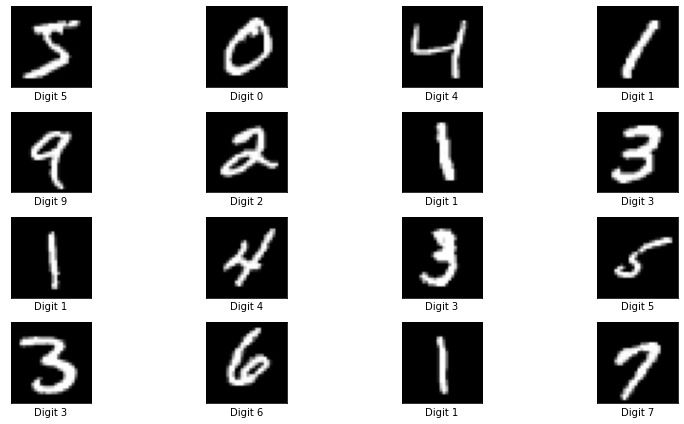

In [5]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

plt.figure(figsize=(12,6))

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
  plt.xlabel('Digit {}'.format(trainy[i]))
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show()

## Data Pre-Processing

### - Re-Shape the Feature Vector (X)

In [6]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

### - Re-Scale the Feature (X) and Target(Y)  Vectors

In [7]:
# One-Hot Encoding of the Target Vector
trainy = to_categorical(trainy, 10)
testy = to_categorical(testy, 10)

In [8]:
# Scaling the Feature Vector down to [0, 1]
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

## Model Building - CNN 

### - Defining the Layers of the CNN Model and their parameters

In [9]:
img_rows, img_cols = 28, 28
batch_size = 128
epochs = 15
input_shape = (img_rows, img_cols, 1)

# Define a Sequential Model
model = Sequential()

# The following layers are added to the above model

# First Block of Layers: CONV(32) ==> MAX_POOL ==> DROPOUT
model.add( Conv2D(32, kernel_size=(3, 3), 
                  activation="relu", 
                  input_shape = input_shape
                 ))
model.add( MaxPooling2D(pool_size = (2,2)) )
model.add( Dropout(rate = 0.25) )

# Second Block of Layers: CONV(64) ==> MAX_POOL ==> DROPOUT
model.add( Conv2D(64, kernel_size=(3,3), 
                  activation="relu") )
model.add( MaxPooling2D(pool_size = (2,2)) )
model.add( Dropout(rate = 0.25) )

# Flattening the convolutional layers 
model.add(Flatten())

model.add( Dense(256, activation = "relu") )
model.add( Dense(10, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

### - Splitting into Training and Validation Sets

In [11]:
# Splitting sets as Training (80%) and Validation (20%)
trainX, trainy = shuffle(trainX, trainy)

k = (int)(0.2 * len(trainX))
trainX, valX = trainX[k:], trainX[:k]
trainy, valy = trainy[k:], trainy[:k]

print("Shape of trainX, trainy: ", trainX.shape, trainy.shape)
print("Shape of valX, valy: ", valX.shape, valy.shape)

Shape of trainX, trainy:  (48000, 28, 28, 1) (48000, 10)
Shape of valX, valy:  (12000, 28, 28, 1) (12000, 10)


### - Model Fitting over the Training and Validation Data

In [12]:
history = model.fit(trainX, trainy,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (valX, valy))

Epoch 1/15
375/375 [==============================] - 33s 6ms/step - loss: 0.2708 - accuracy: 0.9169 - val_loss: 0.0915 - val_accuracy: 0.9699
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0805 - accuracy: 0.9753 - val_loss: 0.0572 - val_accuracy: 0.9813
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0583 - accuracy: 0.9818 - val_loss: 0.0460 - val_accuracy: 0.9866
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0413 - val_accuracy: 0.9872
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0365 - val_accuracy: 0.9885
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0340 - val_accuracy: 0.9899
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0314 - val_accuracy: 0.9912
Epoch

### - Model Training Results

1. Accuracy of Training and Validation Sets

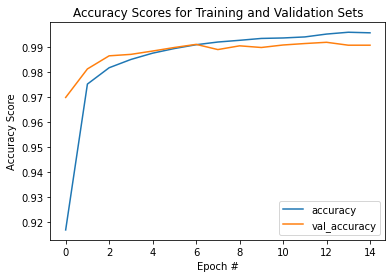

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch #')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Training and Validation Sets')

plt.legend(loc = 'lower right')
plt.show()

2. Loss Values for Training and Validation Sets

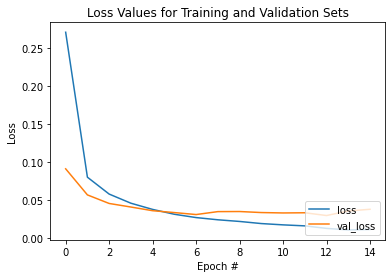

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Loss Values for Training and Validation Sets')

plt.legend(loc = 'lower right')
plt.show()

## Model Testing over Testing Data set

In [15]:
test_loss, test_acc = model.evaluate(testX, testy)
print(f'\033[1mTesting Data Results: \033[0m')
print(f'\t Loss Value: {round(test_loss*100, 3)}%')
print(f'\t Accuracy Value: {round(test_acc*100, 3)}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.9930
Testing Data Results: 
	 Loss Value: 2.423%
	 Accuracy Value: 99.3%


## Predicting Samples using the CNN Model

In [16]:
# Converting for printing the Images
pltX = testX.copy()
pltX = np.squeeze(pltX)

# Get a model prediction
y_pred = model.predict(testX)

In [17]:
def plt_img(index):

  # Plotting the Test Image
  plt.subplot(1, 2, 1)
  plt.title('{}th Test Case'.format(index), fontsize=15)
  plt.xlabel('Predicted Digit: {}'.format(target_labels[np.argmax(y_pred[index])]), 
             fontsize=12)
  plt.imshow(pltX[index])
  plt.yticks([])
  plt.xticks([])

  # Plotting the Probability Prediction Distribution over all classes
  plt.subplot(1, 2, 2)
  thisplot = plt.bar(np.arange(10), y_pred[index], color='red')
  plt.title('Prediction Probabilities over all Classes')
  plt.ylabel('Probability')
  plt.ylim(0, 1)
  plt.xlim(-1,10)

  plt.xticks(np.arange(len(target_labels)), target_labels,
             rotation=90, horizontalalignment='center', fontweight='light')

  true_label = np.argmax(testy[index])
  predicted_label = np.argmax(y_pred[index])

  thisplot[predicted_label].set_color('blue')
  thisplot[true_label].set_color('green')

  plt.tight_layout()

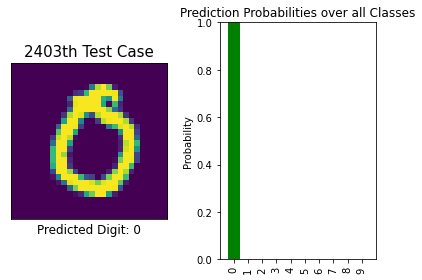

In [18]:
index = np.random.choice(np.arange(0, len(testy)))
plt_img(index)

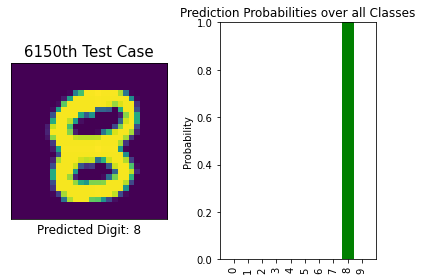

In [19]:
index = np.random.choice(np.arange(0, len(testy)))
plt_img(index)

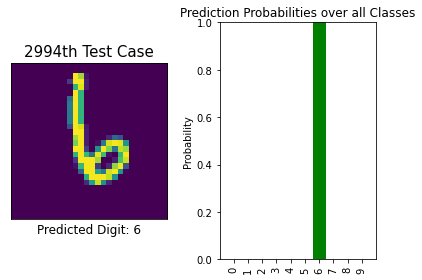

In [21]:
index = np.random.choice(np.arange(0, len(testy)))
plt_img(index)

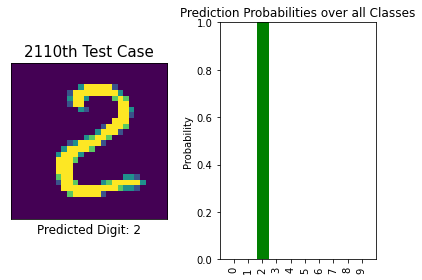

In [34]:
index = np.random.choice(np.arange(0, len(testy)))
plt_img(index)

### Final Model Results

In [35]:
# Get Absolute Prediction and True Labels

# preds = y_pred.argmax(axis=1)
preds = [np.argmax(x) for x in y_pred]
preds = np.array(preds)

# true = testy.argmax(axis=1)
true = [np.argmax(x) for x in testy]
true = np.array(true)

In [36]:
print('Final Classification Report')
print(classification_report(true, preds,target_names = target_labels))

Final Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



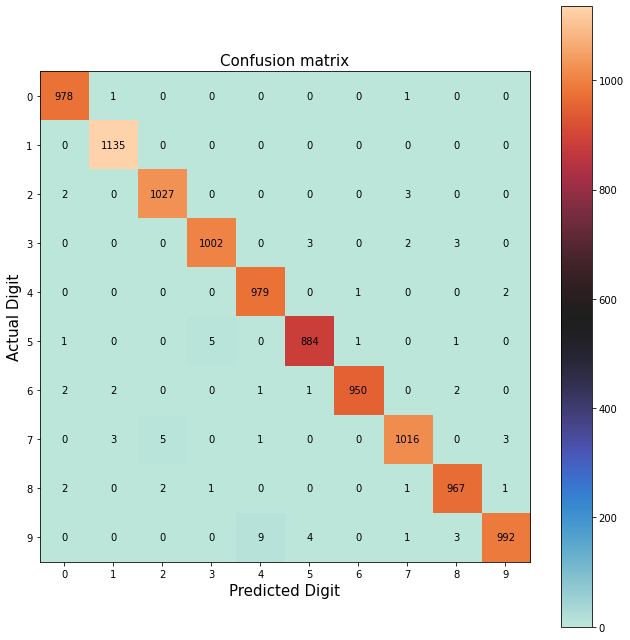

In [37]:
# Extracting the Confusion Matrix
cm = confusion_matrix(true, preds)

# Plotting the Confusion Matrix
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='icefire')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
plt.xticks(np.arange(10), target_labels, size = 10)
plt.yticks(np.arange(10), target_labels, size = 10)
plt.tight_layout()
plt.ylabel('Actual Digit', size = 15)
plt.xlabel('Predicted Digit', size = 15)

# Filling in the values of the CM
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                     horizontalalignment='center',
                     verticalalignment='center')

## Load Sample Input Image

In [38]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# load and prepare the image
def load_image(filename):
  img = load_img(filename, color_mode="grayscale", target_size=(28, 28),
                 interpolation='nearest')
  img = img_to_array(img)
  print(img.shape)
  img = img.reshape(1, 28, 28, 1)

  img = img.astype('float32')
  img = img / 255.0
  return img

In [67]:
# display the sample test image in greyscale
def show_input_image(img_path):
  img = load_image(img_path)

  p_img = img.copy()
  p_img = np.squeeze(p_img)

  plt.imshow(p_img, cmap=plt.get_cmap('gray'))

  return img, p_img

In [68]:
# display the sample test image and the model prediction outcomes
def plt_sample_img(img, p_img):

  # Making prediction on the Test Image
  pred = model.predict(img)
  print(y_pred[25])
  print(pred)
  print(np.argmax(pred))

  # Plotting the Test Image
  plt.subplot(1, 2, 1)
  plt.imshow(p_img)
  plt.yticks([])
  plt.xticks([])

  # Plotting the Probability Prediction Distribution over all classes
  plt.subplot(1, 2, 2)
  thisplot = plt.bar(np.arange(10), pred[0], color='red')
  plt.title('Prediction Probabilities over all Classes')
  plt.ylabel('Probability')
  plt.ylim(0, 1)
  plt.xlim(-1,10)

  plt.xticks(np.arange(len(target_labels)), target_labels,
              rotation=90, horizontalalignment='center', fontweight='light')

  # true_label = np.argmax(testy[index])
  predicted_label = np.argmax(pred[0])

  thisplot[predicted_label].set_color('blue')
  # thisplot[true_label].set_color('green')

  plt.tight_layout()

### Sample Input Image 01

(28, 28, 1)


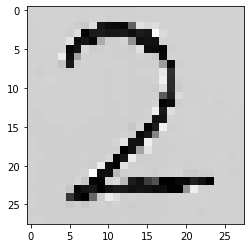

In [69]:
img, p_img = show_input_image('012.jpeg')

[1.0000000e+00 6.6547663e-13 1.9005511e-10 1.2358779e-13 1.5144712e-10
 4.4573106e-10 2.8892936e-08 8.8941346e-12 2.0136874e-09 1.5373155e-09]
[[1.8869714e-01 8.6472910e-03 7.3384410e-01 2.1499554e-03 4.3469496e-02
  6.0742127e-04 2.1318942e-03 3.7729081e-03 1.2866990e-02 3.8127303e-03]]
2


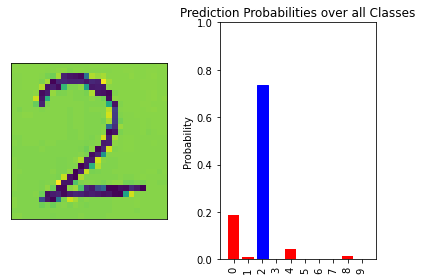

In [70]:
plt_sample_img(img, p_img)

### Sample Input Image 02

(28, 28, 1)


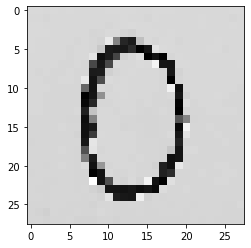

In [71]:
img, p_img = show_input_image('00-0.jpeg')

[1.0000000e+00 6.6547663e-13 1.9005511e-10 1.2358779e-13 1.5144712e-10
 4.4573106e-10 2.8892936e-08 8.8941346e-12 2.0136874e-09 1.5373155e-09]
[[7.52859652e-01 9.68241040e-03 2.17130221e-03 4.18833923e-03
  5.81783999e-04 3.64877400e-03 1.11353576e-01 4.65912133e-04
  1.11569554e-01 3.47859715e-03]]
0


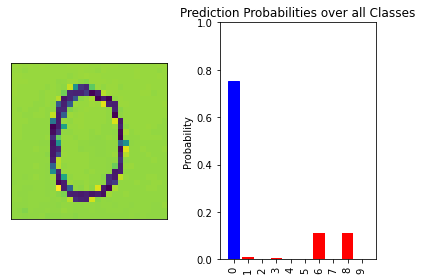

In [72]:
plt_sample_img(img, p_img)